In [377]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from tensorflow.keras.layers import Dropout

from sklearn.preprocessing import MinMaxScaler,StandardScaler
min_max_scaler = MinMaxScaler()
scaler = StandardScaler()



In [333]:
df = pd.read_csv("BTC-USD.csv", date_parser = True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [334]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704
2712,2022-02-19,40022.132813,40246.027344,40010.867188,40126.429688,40126.429688,22263900160


In [335]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [336]:
df_train = df[df['Date']<'2022-01-15'].copy()
df_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2672,2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331
2673,2022-01-11,41819.507813,43001.156250,41407.753906,42735.855469,42735.855469,26327648900
2674,2022-01-12,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,33499938689
2675,2022-01-13,43946.742188,44278.421875,42447.042969,42591.570313,42591.570313,47691135082


In [337]:
df_test = df[df['Date']<'2022-01-15'].copy()
df_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2672,2022-01-10,41910.230469,42199.484375,39796.570313,41821.261719,41821.261719,32104232331
2673,2022-01-11,41819.507813,43001.156250,41407.753906,42735.855469,42735.855469,26327648900
2674,2022-01-12,42742.179688,44135.367188,42528.988281,43949.101563,43949.101563,33499938689
2675,2022-01-13,43946.742188,44278.421875,42447.042969,42591.570313,42591.570313,47691135082


In [338]:
training_data = df_train.drop(['Date', 'Adj Close'], axis = 1)
training_data

,Open,High,Low,Close,Volume
0,465.864014,468.174011,452.421997,457.334015,21056800
1,456.859985,456.859985,413.104004,424.440002,34483200
2,424.102997,427.834991,384.532013,394.795990,37919700
3,394.673004,423.295990,389.882996,408.903992,36863600
4,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2672,41910.230469,42199.484375,39796.570313,41821.261719,32104232331
2673,41819.507813,43001.156250,41407.753906,42735.855469,26327648900
2674,42742.179688,44135.367188,42528.988281,43949.101563,33499938689
2675,43946.742188,44278.421875,42447.042969,42591.570313,47691135082


In [339]:
training_data = min_max_scaler.fit_transform(training_data)
training_data

array([[4.28907290e-03, 3.73944128e-03, 4.24270741e-03, 4.14358659e-03,
        4.31449241e-05],
       [4.15542811e-03, 3.57446063e-03, 3.64887469e-03, 3.65546320e-03,
        8.14009147e-05],
       [3.66922344e-03, 3.15121937e-03, 3.21734240e-03, 3.21556748e-03,
        9.11925723e-05],
       ...,
       [6.31786998e-01, 6.40492637e-01, 6.39739085e-01, 6.49529999e-01,
        9.54348948e-02],
       [6.49666051e-01, 6.42578655e-01, 6.38501438e-01, 6.29385216e-01,
        1.35870028e-01],
       [6.29659901e-01, 6.28992143e-01, 6.31487061e-01, 6.36925482e-01,
        6.71625048e-02]])

In [340]:
x_train = []
y_train = []

In [341]:
training_data.shape[0]

2677

In [342]:
for i in range(60, training_data.shape[0]):
    print(i)

60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319


In [343]:
x_train.append(training_data[i-60:i])

In [344]:
y_train.append(training_data[i,0])

In [345]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [346]:
x_train.shape

(1, 60, 5)

In [347]:
y_train.shape

(1,)

In [348]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Epoch 1/20
1/1 [==============================] - 6s 6s/step - loss: 7.9522e-05 - val_loss: 0.0069
Epoch 2/20
1/1 [==============================] - 0s 120ms/step - loss: 2.0049e-04 - val_loss: 0.0306
Epoch 3/20
1/1 [==============================] - 0s 104ms/step - loss: 0.0306 - val_loss: 0.0192
Epoch 4/20
1/1 [==============================] - 0s 112ms/step - loss: 0.0041 - val_loss: 0.0061
Epoch 5/20
1/1 [==============================] - 0s 104ms/step - loss: 0.0063 - val_loss: 4.1256e-05
Epoch 6/20
1/1 [==============================] - 0s 104ms/step - loss: 1.3248e-05 - val_loss: 0.0095
Epoch 7/20
1/1 [==============================] - 0s 104ms/step - loss: 0.0223 - val_loss: 0.0078
Epoch 8/20
1/1 [==============================] - 0s 112ms/step - loss: 0.0026 - val_loss: 0.0039
Epoch 9/20
1/1 [==============================] - 0s 112ms/step - loss: 0.0082 - val_loss: 0.0041
Epoch 10/20
1/1 [==============================] - 0s 104ms/step - loss: 0.0176 - val_loss: 0.0089
Epoch 

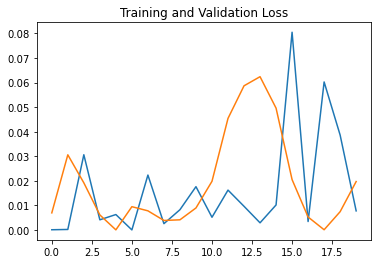

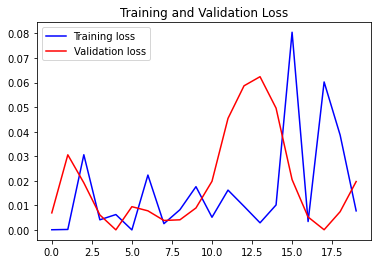

In [349]:
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_train,y_train))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training and Validation Loss")
epoch = range(len(history.history['loss']))
plt.figure()
plt.plot(epoch, history.history['loss'], 'b', label='Training loss')
plt.plot(epoch, history.history['val_loss'], 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [350]:
p_90_days = df_train.tail(90)
data = p_90_days.append(df_test, ignore_index = True)
data = data.drop(['Date', 'Adj Close'], axis = 1)
data.head()

,Open,High,Low,Close,Volume
0,60887.652344,61645.523438,59164.468750,61553.617188,29032367511
1,61548.804688,62614.660156,60012.757813,62026.078125,38055562075
2,62043.164063,64434.535156,61622.933594,64261.992188,40471196346
3,64284.585938,66930.390625,63610.675781,65992.835938,40788955582
4,66002.234375,66600.546875,62117.410156,62210.171875,45908121370


In [351]:
inputs = min_max_scaler.fit_transform(data) 
inputs

array([[0.9011162 , 0.89582501, 0.89099028, 0.91076829, 0.08270539],
       [0.91092954, 0.90995692, 0.90380227, 0.91777927, 0.10841528],
       [0.9182672 , 0.93649426, 0.92812129, 0.95095862, 0.11529818],
       ...,
       [0.631787  , 0.64049264, 0.63973909, 0.64953   , 0.09543489],
       [0.64966605, 0.64257865, 0.63850144, 0.62938522, 0.13587003],
       [0.6296599 , 0.62899214, 0.63148706, 0.63692548, 0.0671625 ]])

In [352]:
inputs.shape[0]

2767

In [368]:
y_pred = y_pred*scale
y_test = y_test*scale

In [369]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])
    
X_test,y_test = np.array(X_test), np.array(y_test)
X_test.shape,y_test.shape

((2707, 60, 5), (2707,))

In [370]:
y_pred = model.predict(X_test)

85/85 [==============================] - 4s 50ms/step


In [371]:
min_max_scaler.scale_

array([1.48427770e-05, 1.45819584e-05, 1.51033327e-05, 1.48392776e-05,
       2.84931110e-12])

In [372]:
scale = 1/1.48427770e-05
scale

67372.83730665765

In [373]:
y_pred = y_pred*scale
y_test = y_test*scale

In [374]:
y_pred

array([[34684.83 ],
       [34560.605],
       [34439.676],
       ...,
       [33133.582],
       [33051.19 ],
       [32965.582]], dtype=float32)

In [375]:
y_test

array([48723.56779374, 47476.83341995, 46042.35685835, ...,
       42565.28264372, 43769.84514255, 42421.97404986])

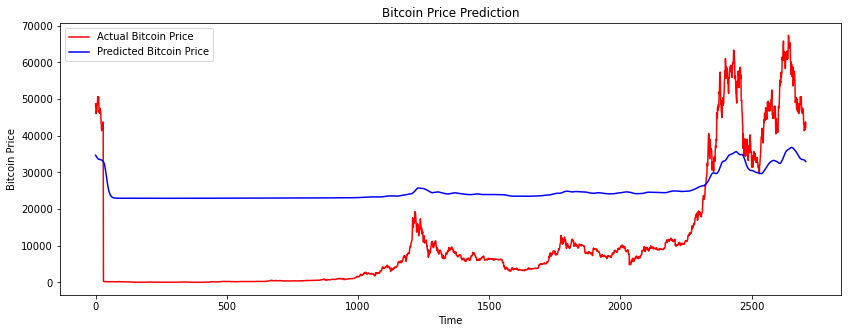

In [376]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Actual Bitcoin Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()